# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 1: Review of the core modules NumPy, Pandas, and Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

##### Excercise 1
Use adult.csv and Boolean Masking to answer the following questions. 

In [2]:
adult_df = pd.read_csv('adult.csv')
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


    a)	Calculate the mean and median of education-num for every race in the data. 
    b)	Draw one histogram of education-num that includes the data for each race in the data. 
    c)	Draw a comparative boxplot that compares the education-num for each race.
    d)	Create a subplot that puts the visual from b on top of the one on c.

In [3]:
adult_df.groupby('race')['education-num'].mean()
adult_df.groupby('race')['education-num'].median()

race
Amer-Indian-Eskimo     9.0
Asian-Pac-Islander    10.0
Black                  9.0
Other                  9.0
White                 10.0
Name: education-num, dtype: float64

race
Amer-Indian-Eskimo    Axes(0.125,0.11;0.775x0.77)
Asian-Pac-Islander    Axes(0.125,0.11;0.775x0.77)
Black                 Axes(0.125,0.11;0.775x0.77)
Other                 Axes(0.125,0.11;0.775x0.77)
White                 Axes(0.125,0.11;0.775x0.77)
Name: education-num, dtype: object

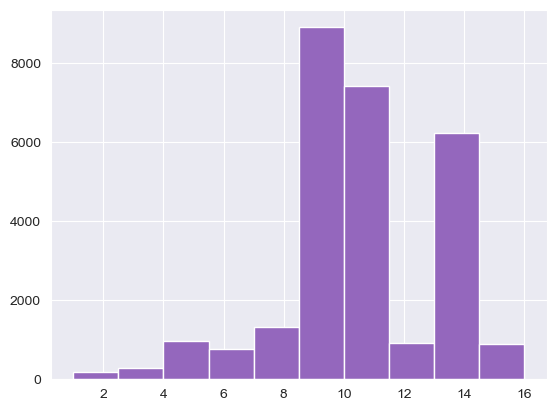

In [4]:
#     b)	Draw one histogram of education-num that includes the data for each race in the data. 
adult_df.groupby('race')['education-num'].hist()

In [15]:
#     c)	Draw a comparative boxplot that compares the education-num for each race.
adult_df.groupby('race')['education-num'].mean()

race
Amer-Indian-Eskimo     9.311897
Asian-Pac-Islander    10.960539
Black                  9.486236
Other                  8.841328
White                 10.135246
Name: education-num, dtype: float64

In [17]:
column = adult_df['race'].unique()
column

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

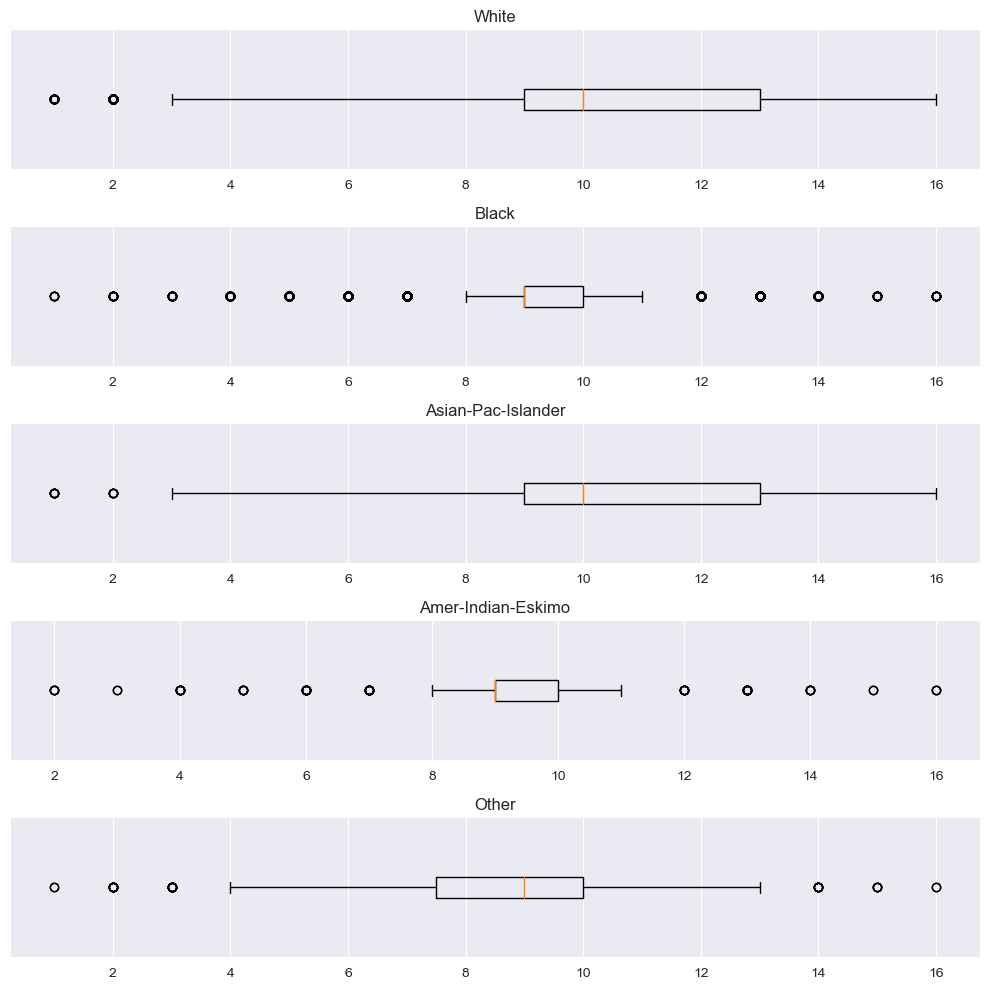

In [22]:
plt.figure(figsize=(10,10))
for i,col in enumerate(column):
    plt.subplot(len(column),1,i+1)
    plt.boxplot(adult_df[adult_df['race']==col]['education-num'],vert=False)
    plt.title(col)
    plt.yticks([])
    

plt.tight_layout()
plt.savefig('ColumnsVsiaulization.png', dpi=900)
plt.show()

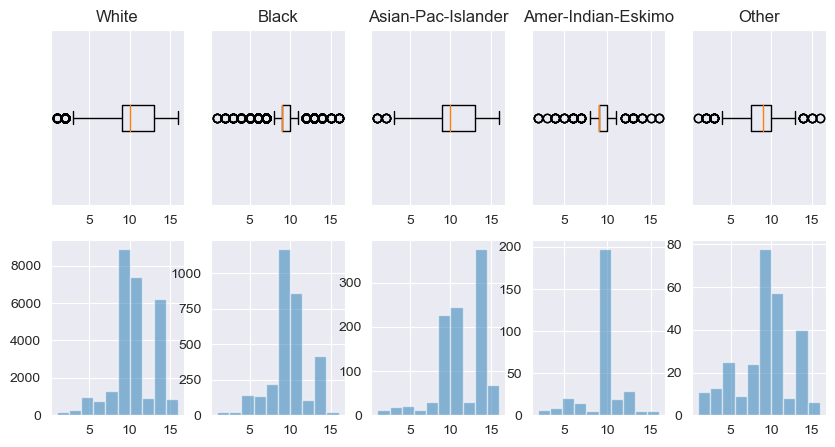

In [40]:
   # d)	Create a subplot that puts the visual from b on top of the one on c.

plt.figure(figsize=(10,5))
for i,col in enumerate(column):
    plt.subplot(2,len(column),i+1)
    plt.boxplot(adult_df[adult_df['race']==col]['education-num'],vert=False)
    # plt.yticks([1], [col])
    plt.title(col)
    plt.yticks([])
    plt.subplot(2,len(column),i+1 + len(column))
    plt.hist(adult_df[adult_df['race']==col]['education-num'],alpha=0.5)

##### Excercise 2    
    a)	Repeat the analysis on Exercise 1. a), but this time use groupby function. 
    b)	b) compare the runtime of using BM vs. groupby. (hint: you can import the module time and use the fuction .time()) 


##### Excercise 3 

    If you have not already, solve exercise 4 in the previous chapter. After you created pvt_df for Exercises 4, run the following code.


/Users/kearney/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


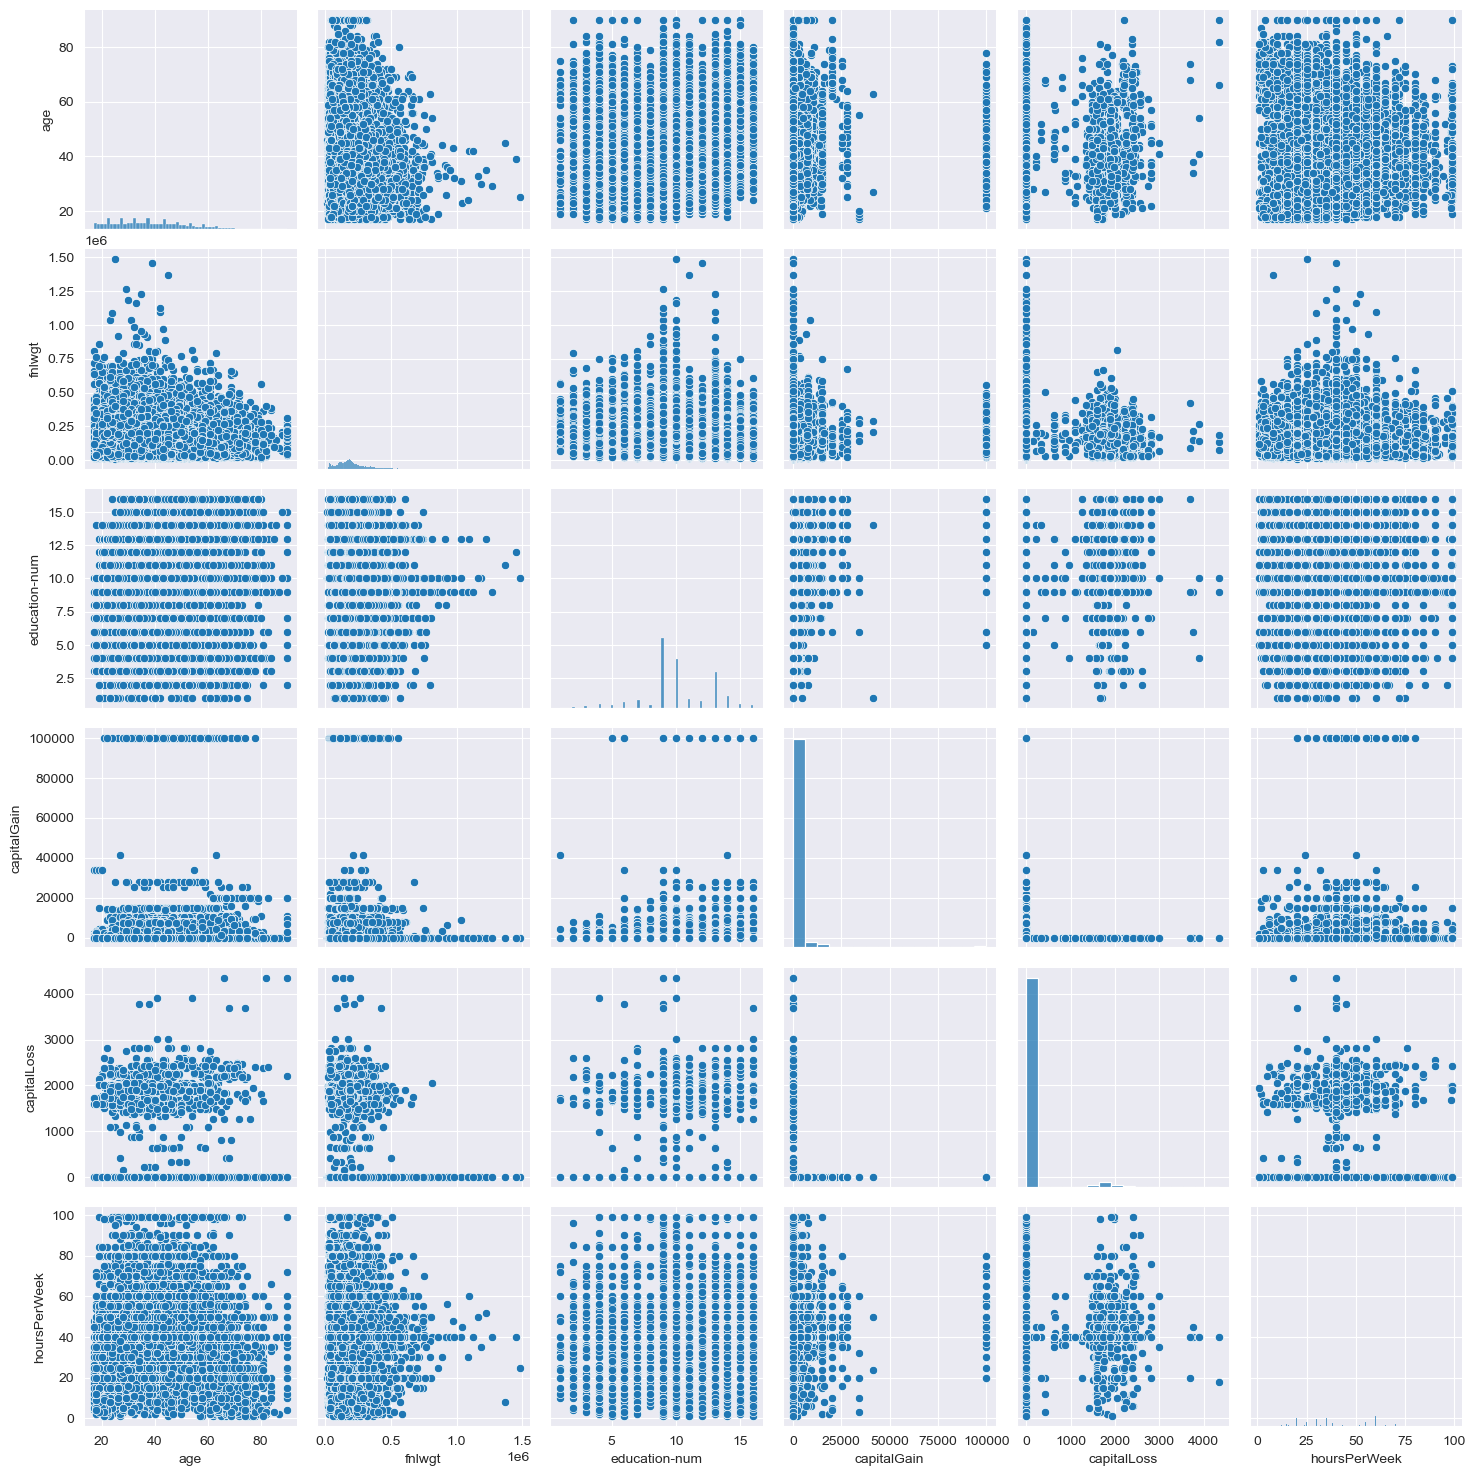

In [24]:
import seaborn as sns
pvt_df = pd.read_csv('adult.csv')
sns.pairplot(pvt_df)

    The code ouputs what is known as scatter matrix. This code takes advantage of seaborn modue which is another very useful visualization moduel. To practice, subploting and resizing, recreate what seaborn can do with sns.pairplot(). (Hint: doing this with plt.subplot() might be a bit too challenging for you. First give it a try and figure out what is the challenge, then google plt.subplot2grid())